# Table of Contents
 <p><div class="lev1 toc-item"><a href="#MICS-Whales" data-toc-modified-id="MICS-Whales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MICS Whales</a></div><div class="lev2 toc-item"><a href="#Import-statement" data-toc-modified-id="Import-statement-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import statement</a></div><div class="lev2 toc-item"><a href="#Log-Progress" data-toc-modified-id="Log-Progress-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Log Progress</a></div><div class="lev2 toc-item"><a href="#Ideas" data-toc-modified-id="Ideas-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ideas</a></div><div class="lev3 toc-item"><a href="#Questions-to-Answer" data-toc-modified-id="Questions-to-Answer-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Questions to Answer</a></div><div class="lev3 toc-item"><a href="#Observations-&amp;-Preliminary-Ideas-about-the-data-set." data-toc-modified-id="Observations-&amp;-Preliminary-Ideas-about-the-data-set.-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Observations &amp; Preliminary Ideas about the data set.</a></div><div class="lev3 toc-item"><a href="#Causal-Diagram" data-toc-modified-id="Causal-Diagram-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Causal Diagram</a></div><div class="lev3 toc-item"><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-134"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Data Cleaning</a></div><div class="lev2 toc-item"><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Cleaning</a></div><div class="lev3 toc-item"><a href="#Only-look-at-those-rows-with-ids" data-toc-modified-id="Only-look-at-those-rows-with-ids-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Only look at those rows with ids</a></div><div class="lev3 toc-item"><a href="#Data-with-cleaned-rows-and-columns" data-toc-modified-id="Data-with-cleaned-rows-and-columns-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Data with cleaned rows and columns</a></div><div class="lev3 toc-item"><a href="#Cleaned-Matrix" data-toc-modified-id="Cleaned-Matrix-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Cleaned Matrix</a></div><div class="lev2 toc-item"><a href="#Sampling-models" data-toc-modified-id="Sampling-models-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Sampling models</a></div><div class="lev2 toc-item"><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Descriptive Statistics</a></div><div class="lev3 toc-item"><a href="#What-is-the-longest-observed-Years-Since-Previous-Birth-(YSPB)?" data-toc-modified-id="What-is-the-longest-observed-Years-Since-Previous-Birth-(YSPB)?-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>What is the longest observed Years Since Previous Birth (YSPB)?</a></div><div class="lev3 toc-item"><a href="#Questions" data-toc-modified-id="Questions-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Questions</a></div><div class="lev4 toc-item"><a href="#Assumptions-about-age" data-toc-modified-id="Assumptions-about-age-1621"><span class="toc-item-num">1.6.2.1&nbsp;&nbsp;</span>Assumptions about age</a></div><div class="lev2 toc-item"><a href="#Generate-priors" data-toc-modified-id="Generate-priors-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Generate priors</a></div><div class="lev3 toc-item"><a href="#age-priors" data-toc-modified-id="age-priors-171"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>age priors</a></div><div class="lev4 toc-item"><a href="#known_born_years" data-toc-modified-id="known_born_years-1711"><span class="toc-item-num">1.7.1.1&nbsp;&nbsp;</span>known_born_years</a></div><div class="lev3 toc-item"><a href="#prior_name" data-toc-modified-id="prior_name-172"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>prior_name</a></div><div class="lev3 toc-item"><a href="#create_columns_with_prior_year" data-toc-modified-id="create_columns_with_prior_year-173"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>create_columns_with_prior_year</a></div><div class="lev3 toc-item"><a href="#get_min_age_prior" data-toc-modified-id="get_min_age_prior-174"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>get_min_age_prior</a></div><div class="lev3 toc-item"><a href="#set_priors_dict" data-toc-modified-id="set_priors_dict-175"><span class="toc-item-num">1.7.5&nbsp;&nbsp;</span>set_priors_dict</a></div><div class="lev3 toc-item"><a href="#generate_random_values" data-toc-modified-id="generate_random_values-176"><span class="toc-item-num">1.7.6&nbsp;&nbsp;</span>generate_random_values</a></div><div class="lev3 toc-item"><a href="#parse_prior_individual" data-toc-modified-id="parse_prior_individual-177"><span class="toc-item-num">1.7.7&nbsp;&nbsp;</span>parse_prior_individual</a></div><div class="lev3 toc-item"><a href="#orig_matrix_with_prior_year" data-toc-modified-id="orig_matrix_with_prior_year-178"><span class="toc-item-num">1.7.8&nbsp;&nbsp;</span>orig_matrix_with_prior_year</a></div><div class="lev3 toc-item"><a href="#zeros_df" data-toc-modified-id="zeros_df-179"><span class="toc-item-num">1.7.9&nbsp;&nbsp;</span>zeros_df</a></div><div class="lev3 toc-item"><a href="#Finding-good-priors" data-toc-modified-id="Finding-good-priors-1710"><span class="toc-item-num">1.7.10&nbsp;&nbsp;</span>Finding good priors</a></div><div class="lev4 toc-item"><a href="#Birth-model" data-toc-modified-id="Birth-model-17101"><span class="toc-item-num">1.7.10.1&nbsp;&nbsp;</span>Birth model</a></div><div class="lev5 toc-item"><a href="#When-whale-already-had-birth-before" data-toc-modified-id="When-whale-already-had-birth-before-171011"><span class="toc-item-num">1.7.10.1.1&nbsp;&nbsp;</span>When whale already had birth before</a></div><div class="lev2 toc-item"><a href="#model_pyabc" data-toc-modified-id="model_pyabc-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>model_pyabc</a></div><div class="lev3 toc-item"><a href="#model-test" data-toc-modified-id="model-test-181"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>model test</a></div><div class="lev3 toc-item"><a href="#debug_test_params" data-toc-modified-id="debug_test_params-182"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>debug_test_params</a></div><div class="lev2 toc-item"><a href="#Run-the-model" data-toc-modified-id="Run-the-model-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Run the model</a></div><div class="lev3 toc-item"><a href="#distance-function" data-toc-modified-id="distance-function-191"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>distance function</a></div>

# MICS Whales

## Import statement

In [1]:
from IPython.core.debugger import set_trace
import itertools
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from pyabc import (ABCSMC, RV, Distribution, PercentileDistanceFunction, 
                   QuantileEpsilon, MedianEpsilon, ListEpsilon)
from pyabc.sampler import (
    MulticoreEvalParallelSampler, 
    MulticoreParticleParallelSampler,
    SingleCoreSampler
)
import pymc3 as pm
import re
import scipy.optimize as opt
import scipy as sp
import seaborn as sns
import tempfile
# locals
from lib.sampler import (
    model_simple,
    logistic
)

from lib.pymc3_implementation import (
    alive, repr_active, birth_with_no_yspb, birth_with_yspb_quadratic, observed_count
)
%matplotlib inline

## Log Progress

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    # from https://github.com/alexanderkuk/log-progress
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

## Ideas

Earlier work (Civil, _et al._) showed that age and Years Since Previous Birth (YSPB) are predictive of giving birth at a certain year. For example, female whales less than age 9 are much less likely to give birth than their older counterparts. Likewise, YSPB gives information about the probability of giving birth. For example, female whales that just gave birth in year $t$ don't give birth in $t+1$. In many cases, however, we don't know the values for some individuals over a certain time. For example, we might not exactly know the age of an individual female because we weren't able to observe the individual from being born. Likewise, we might not exactly know what YSPB is for a whale at a certain time because of censoring. Let's say a whale was observed to have given birth at year $t$ and $t+5$, and we’re interested in YSPB for $t+5$. However, the whale was not observed at $t+2$, $t+3$, $t+4$. The whale could have given birth at the years when the individual was unobserved. Therefore, YSPB, like age, can be viewed as probabilistic random variables in some individuals at certain times. Bayesian inference lets us take into account prior knowledge such as plausible values for YSPB to find parameters that best align with the data and our beliefs. Work in the past did not estimate birth rate taking uncertainty in YSPB and uncertainty in reproductive status, which might lead to a biased estimate of birth rate (i.e. over-estimate of the population birth rate). By encoding knowledge in the form of priors, we are able to make use of the full data set (including unexperienced mothers), leading to estimates of birth rates that should be less biased and more representative of the birth rate of reproductively-active females.

### Questions to Answer

- Over time, what is the birth rate for reproductively-active females, taking into account various uncertainties and censoring? 

### Observations & Preliminary Ideas about the data set.

* a "2" means a female and a calf. a "1" means just the female (no birth). Blank means the female whale was not spotted.

* Some individuals are more represented since they're older and had more of a longer time to be reproductively mature.

* We are missing data. We don't know what happened with a whale when it's been missing for a while. Did it die? Or was it alive, and if so, did it give birth? Or maybe some unknown variable (i.e. food levels or increasing temperature of oceans) are driving whales to go to other places.

* Back-to-back births seem implausible (i.e. birth at year $t$ means there is no birth at $t+1$).

* For some whales, we know exactly when they were born (i.e. they were spotted as a calf at some point). For others, we're not sure what their age is.

* At 9 years of age, a whale becomes considered "reproductively active."

### Causal Diagram
See [Daggity](http://dagitty.net/development/dags.html?id=APEuih#).

![Snapshot](img/whales-with-seen-before-birth-affected-by-age.png) 


### Data Cleaning

* Original data set has rows listing individuals, and columns indicating  observations across time.

* We'll convert that data set into this format so that it can be more easily processed for Bayesian computation:

| mics_id | year_since_1980 | number_observed | age |
|-|-|-|
|this one is the id | self-explanatory | could be 0 (censored), 1 (mother seen), and 2 (mother seen with calf) | "uncertain" when we don't know the year of birth, some integer otherwise |

## Data Cleaning

In [3]:
calving_data = pd.read_excel('./data/females_calving_2016 up to date.xlsx')
calving_data

,MICS,HWC numbers,80,81,82,83,84,85,86,87,...,08,09,10,11,12,13,14,15,16,Unnamed: 39
0,H002,3229,1.0,NaN,NaN,1.0,1,NaN,NaN,1.0,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN
1,H004,1422,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H008,1417,NaN,NaN,2.0,1.0,1,2.0,NaN,NaN,...,1.0,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,2.000000,NaN
3,H009,1419,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN
4,H035,2088,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H042,1451,NaN,NaN,NaN,1.0,1,NaN,NaN,1.0,...,2.0,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000,NaN
6,H044,1424,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H065,7002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,H067,7014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,H102,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,...,1.0,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN


### Only look at those rows with ids

In [4]:
with_ids = calving_data[calving_data['MICS'].notnull() | calving_data['HWC numbers'].notnull()]
with_ids

,MICS,HWC numbers,80,81,82,83,84,85,86,87,...,08,09,10,11,12,13,14,15,16,Unnamed: 39
0,H002,3229,1.0,NaN,NaN,1.0,1,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
1,H004,1422,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H008,1417,NaN,NaN,2.0,1.0,1,2.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,NaN
3,H009,1419,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
4,H035,2088,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H042,1451,NaN,NaN,NaN,1.0,1,NaN,NaN,1.0,...,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN
6,H044,1424,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H065,7002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,H067,7014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,H102,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN


In [5]:
with_ids.index = with_ids['MICS'].astype(str) + '-' + with_ids['HWC numbers'].astype(str)
with_ids

,MICS,HWC numbers,80,81,82,83,84,85,86,87,...,08,09,10,11,12,13,14,15,16,Unnamed: 39
H002-3229,H002,3229,1.0,NaN,NaN,1.0,1,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
H004-1422,H004,1422,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H008-1417,H008,1417,NaN,NaN,2.0,1.0,1,2.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,NaN
H009-1419,H009,1419,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN
H035-2088,H035,2088,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H042-1451,H042,1451,NaN,NaN,NaN,1.0,1,NaN,NaN,1.0,...,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN
H044-1424,H044,1424,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H065-7002,H065,7002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H067-7014,H067,7014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H102-nan,H102,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN


In [6]:
def yearify(x):
    _x = int(x)
    if _x >= 80:
        return 1900 + _x
    else:
        return 2000 + _x

In [7]:
with_ids.columns

Index([       'MICS', 'HWC numbers',            80,            81,
                  82,            83,            84,            85,
                  86,            87,            88,            89,
                  90,            91,            92,            93,
                  94,            95,            96,            97,
                  98,            99,          '00',          '01',
                '02',          '03',          '04',          '05',
                '06',          '07',          '08',          '09',
                '10',            11,            12,          '13',
                '14',          '15',            16, 'Unnamed: 39'],
      dtype='object')

In [8]:
unsorted_years_xx = list(set(with_ids.columns) - set(['MICS', 'HWC numbers', 'Unnamed: 39']))

In [9]:
with_ids_unsorted_years_xx = with_ids[unsorted_years_xx]

In [10]:
with_ids_unsorted_years_xx

,03,11,12,16,02,05,10,04,13,14,...,95,97,98,99,09,01,15,08,07,00
H002-3229,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
H004-1422,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,...,NaN,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0
H008-1417,1.0,1.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,...,NaN,2.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN
H009-1419,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
H035-2088,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H042-1451,1.0,1.0,NaN,2.0,1.0,2.0,1.0,NaN,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,2.0,1.0,1.0
H044-1424,1.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,...,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,2.0,1.0
H065-7002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H067-7014,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,1.0
H102-nan,NaN,1.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [11]:
unsorted_years_xxxx = list(
        map(
            lambda x: str(x),
            map(
                yearify,
                with_ids_unsorted_years_xx.columns
            )
        )
    )

In [12]:
unsorted_years_xxxx

['2003',
 '2011',
 '2012',
 '2016',
 '2002',
 '2005',
 '2010',
 '2004',
 '2013',
 '2014',
 '2006',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1989',
 '1990',
 '1991',
 '1988',
 '1992',
 '1993',
 '1994',
 '1996',
 '1995',
 '1997',
 '1998',
 '1999',
 '2009',
 '2001',
 '2015',
 '2008',
 '2007',
 '2000']

In [13]:
with_ids_unsorted_years_xx.columns = unsorted_years_xxxx
with_ids_unsorted_years_xx

,2003,2011,2012,2016,2002,2005,2010,2004,2013,2014,...,1995,1997,1998,1999,2009,2001,2015,2008,2007,2000
H002-3229,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
H004-1422,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,...,NaN,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0
H008-1417,1.0,1.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,...,NaN,2.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN
H009-1419,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
H035-2088,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H042-1451,1.0,1.0,NaN,2.0,1.0,2.0,1.0,NaN,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,2.0,1.0,1.0
H044-1424,1.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,...,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,2.0,1.0
H065-7002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H067-7014,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,1.0
H102-nan,NaN,1.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


### Data with cleaned rows and columns

In [14]:
with_ids_sorted_years_xxxx = with_ids_unsorted_years_xx[
    sorted(
        unsorted_years_xxxx
    )
]
with_ids_sorted_years_xxxx


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
H002-3229,1.0,NaN,NaN,1.0,1,NaN,NaN,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
H004-1422,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
H008-1417,NaN,NaN,2.0,1.0,1,2.0,NaN,NaN,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0
H009-1419,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
H035-2088,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H042-1451,NaN,NaN,NaN,1.0,1,NaN,NaN,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0
H044-1424,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
H065-7002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H067-7014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H102-nan,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0


### Cleaned Matrix

In [15]:
cleaned_matrix = with_ids_sorted_years_xxxx.fillna(value=0).astype(int)
cleaned_matrix

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
H002-3229,1,0,0,1,1,0,0,1,1,2,...,2,1,1,1,1,1,1,1,2,1
H004-1422,0,0,1,2,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
H008-1417,0,0,2,1,1,2,0,0,1,2,...,1,1,1,1,1,1,0,1,1,2
H009-1419,0,0,1,0,0,0,0,1,1,1,...,1,2,1,1,1,1,1,1,2,1
H035-2088,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H042-1451,0,0,0,1,1,0,0,1,2,1,...,1,2,1,1,1,0,1,1,1,2
H044-1424,0,0,1,1,0,1,1,1,1,1,...,2,1,0,2,0,0,0,0,0,0
H065-7002,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
H067-7014,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
H102-nan,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,1,1,0,1,1,1


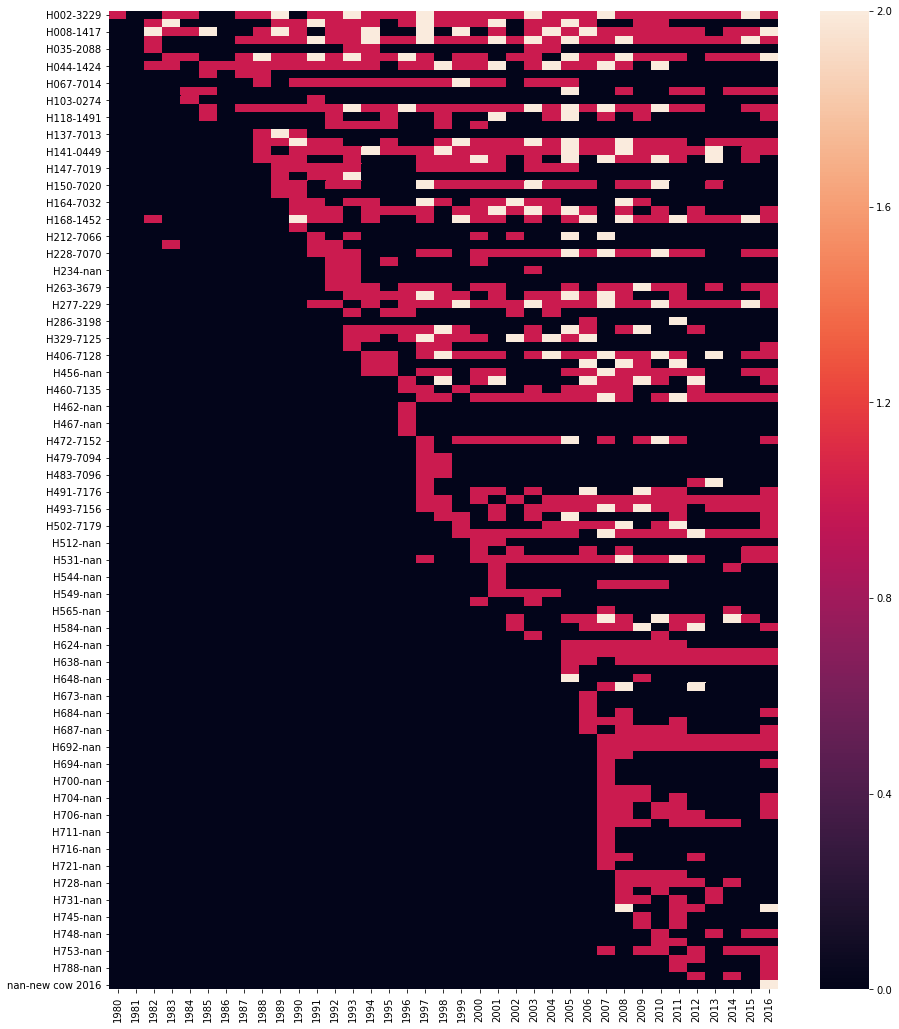

In [16]:
plt.figure(figsize=(15,18))
sns.heatmap(cleaned_matrix)

## Sampling models

These models would be used to simulate data to help us infer the most plausible values of parameters.

In [17]:
observed_counts_shape = (114, 36)

## Descriptive Statistics

### What is the longest observed Years Since Previous Birth (YSPB)?

It's useful to know this to inform our modelling of the data generating process. This serves as a sort of limit.

In [18]:
np.where(cleaned_matrix.iloc[0] == 2)[0]

array([ 9, 13, 17, 23, 27, 35])

In [19]:
np.where(cleaned_matrix.iloc[0] == 0)[0]

array([ 1,  2,  5,  6, 10])

### Questions

#### Assumptions about age
[Life expectancy of humpback whales may be up to 80 years.](https://www.afsc.noaa.gov/nmml/education/cetaceans/humpback.php)

## Generate priors

### age priors

#### known_born_years

In [20]:
known_born_years = {
    'H009-1419': 1982,
    'H065-7002': 1985,
    'H067-7014': 1988,
    'H169-7029': 1990,
    'H456-nan': 1994,
    'H464-nan': 1996,
    'H473-7092': 1997,
    'H479-7094': 1997,
    'H483-7096': 1997,
    'H549-nan': 2001,
    'H551-nan': 2000,
    'H565-nan': 2000,
    'H590-nan': 2003,
    'H624-nan': 2005,
    'H626-nan': 2005,
    'H638-nan': 2005,
    'H647-nan': 2005,
}

In [21]:
RV('randint', 5,6).rvs()

5

### prior_name

In [22]:
def prior_name(var_name, index):
    return var_name + ' | ' + index

### create_columns_with_prior_year

In [23]:
def create_columns_with_prior_year(cleaned_matrix):
    """
        Expects a matrix whose columns are years. Prepends a year prior to the earliest year.
        
        Example: ['1980', ...] => ['1979', '1980', ...]
    """
    columns = cleaned_matrix.columns

    prior_year_string = str(int(columns[0]) - 1)
    columns_with_prior_year = np.insert(columns, 0, [prior_year_string])
    
    return columns_with_prior_year

In [24]:
columns_with_prior_year = create_columns_with_prior_year(cleaned_matrix)

In [25]:
columns_with_prior_year

Index(['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

### get_min_age_prior

In [26]:
def get_min_age_prior(row):
    prior_year = int(cleaned_matrix.columns[0]) - 1
    
    for i in cleaned_matrix.columns:
        year = int(i)
        if row[i] > 0:
            return prior_year - year

In [27]:
min_ages = cleaned_matrix.apply(get_min_age_prior, axis=1)

In [28]:
min_ages.loc['H002-3229']

-1

### set_priors_dict

In [29]:
def set_priors_dict(columns_with_prior_year, min_ages):
    """
        This function sets the prior values.
        
        Returns a dictionary of priors.
        
        The keys are in the form returned by the prior_name function.
        
        Individual priors for the beginning:
             - 'alive', 'repr_active', 'yspb', 'birth', 'age'

        Coefficients shared by all whales in the data set: 
             - 'age_t_minus_1_on_alive_t', 
             - 'yspb_on_birth_t', 
             - 'unobs_(year)',
             - 'unobs_t_minus_1_on_birth_t',
             - 'yspb_on_birth_t',
             - 'age_t_on_birth_t',
             - 'constant_on_birth_t',
             - 'constant_on_birth_t__no_births',
             - unobs_t_minus_1_on_alive_t,
             - constant_on_observed_count_t

    """
    priors_dict = {}

    REPRO_AGE = 9
    LOWER_BOUND_AGE_AT_1979 = -37
    UPPER_BOUND_AGE = 50
    NO_BIRTHS_YET = -1
    UPPER_LIMIT_NUM_BIRTHS = int(UPPER_BOUND_AGE / 2)

    # Set individual priors for the first year.
    for index in cleaned_matrix.index:
        if index in known_born_years:
            age_1979 = 1979 - known_born_years[index]
            priors_dict[prior_name('age', index)] = RV('randint', age_1979, age_1979 + 1)
            if age_1979 < REPRO_AGE:
                # it's kinda weird to use -1 as a value for not having had any births yet. 
                # One might interpret it as the first birth event having happened at the year after,
                # instead of interpreting it as not having birth at all.
                priors_dict[prior_name('yspb', index)] = RV('randint', NO_BIRTHS_YET, NO_BIRTHS_YET + 1)
            else:
                # if whale is reproductively active
                priors_dict[prior_name('yspb', index)] = RV('randint', 0, UPPER_LIMIT_NUM_BIRTHS)
        else:
            min_age = min_ages.loc[index]
            priors_dict[prior_name('age', index)] = RV('randint', min_age, UPPER_BOUND_AGE)
            priors_dict[prior_name('yspb', index)] = RV('randint', NO_BIRTHS_YET, UPPER_LIMIT_NUM_BIRTHS)

        priors_dict[prior_name('alive', index)] = RV('randint', 0, 2)
        priors_dict[prior_name('seen_before', index)] = RV('randint', 0, 2)
    
    shared_priors = [
        'age_t_minus_1_on_alive_t', 
        'yspb_on_birth_t', 
        'unobs_t_minus_1_on_birth_t',
        'yspb_t_on_birth_t',
        'yspb_t_squared_on_birth_t',
        'age_t_on_birth_t',
        'age_t_on_birth_t__no_births',
        'constant_on_birth_t',
        'constant_on_birth_t__no_births',
        'unobs_t_minus_1_on_alive_t',
        'unobs_t_minus_1_on_observed_count_t',
        'unobs_t_minus_1_on_birth_t__no_births',
        'constant_on_observed_count_t',
        'constant_on_alive_t',
    ]
    
    # Set shared priors
    for shared_prior in shared_priors:
        priors_dict[shared_prior] = RV('norm', loc=0, scale=3)
        
    return priors_dict
    

In [30]:
priors_dict = set_priors_dict(columns_with_prior_year, min_ages)
priors_dict

{'age | H002-3229': <RV(name=randint, args=(-1, 50) kwargs={})>,
 'yspb | H002-3229': <RV(name=randint, args=(-1, 25) kwargs={})>,
 'alive | H002-3229': <RV(name=randint, args=(0, 2) kwargs={})>,
 'seen_before | H002-3229': <RV(name=randint, args=(0, 2) kwargs={})>,
 'age | H004-1422': <RV(name=randint, args=(-3, 50) kwargs={})>,
 'yspb | H004-1422': <RV(name=randint, args=(-1, 25) kwargs={})>,
 'alive | H004-1422': <RV(name=randint, args=(0, 2) kwargs={})>,
 'seen_before | H004-1422': <RV(name=randint, args=(0, 2) kwargs={})>,
 'age | H008-1417': <RV(name=randint, args=(-3, 50) kwargs={})>,
 'yspb | H008-1417': <RV(name=randint, args=(-1, 25) kwargs={})>,
 'alive | H008-1417': <RV(name=randint, args=(0, 2) kwargs={})>,
 'seen_before | H008-1417': <RV(name=randint, args=(0, 2) kwargs={})>,
 'age | H009-1419': <RV(name=randint, args=(-3, -2) kwargs={})>,
 'yspb | H009-1419': <RV(name=randint, args=(-1, 0) kwargs={})>,
 'alive | H009-1419': <RV(name=randint, args=(0, 2) kwargs={})>,
 'se

### generate_random_values

In [31]:
def generate_random_values(priors_dict):
    new_dict = {}
    
    for key in priors_dict:
        new_dict[key] = priors_dict[key].rvs()
        
    return new_dict

In [32]:
cleaned_matrix

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
H002-3229,1,0,0,1,1,0,0,1,1,2,...,2,1,1,1,1,1,1,1,2,1
H004-1422,0,0,1,2,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
H008-1417,0,0,2,1,1,2,0,0,1,2,...,1,1,1,1,1,1,0,1,1,2
H009-1419,0,0,1,0,0,0,0,1,1,1,...,1,2,1,1,1,1,1,1,2,1
H035-2088,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H042-1451,0,0,0,1,1,0,0,1,2,1,...,1,2,1,1,1,0,1,1,1,2
H044-1424,0,0,1,1,0,1,1,1,1,1,...,2,1,0,2,0,0,0,0,0,0
H065-7002,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
H067-7014,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
H102-nan,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,1,1,0,1,1,1


### parse_prior_individual

In [33]:
def parse_prior_individual(prior_individual):
    """
        Takes in a string of form 'prior | individual id'
        
        Returns a tuple. First item is the prior, second item is the id of the individual
    """
    characters_before_vertical = r'^[a-z]+(?=|)'
    characters_after_vertical = r'(?<=\| ).*$'
    
    prior = re.search(characters_before_vertical, prior_individual).group(0)
    individual = re.search(characters_after_vertical, prior_individual).group(0)
    
    return (prior, individual)

In [34]:
parse_prior_individual('age | H123-nan')

('age', 'H123-nan')

In [35]:
prior = Distribution(
    **priors_dict
)

In [36]:
prior['age | H002-3229']

<RV(name=randint, args=(-1, 50) kwargs={})>

In [37]:
columns_with_prior_year

Index(['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

### orig_matrix_with_prior_year

In [38]:
def orig_matrix_with_prior_year(cleaned_matrix):
    """
        Makes a copy of the original (cleaned) matrix. Adds a column of zeros for the year before the earliest year.
        
        Parameters:
            cleaned_matrix: a DataFrame object. Columns are years. Rows are IDs of whales.
            
        Returns:
            a DataFrame object
    """
    columns_with_prior_year = create_columns_with_prior_year(cleaned_matrix)
    
    copy = cleaned_matrix.copy()
    copy[columns_with_prior_year.values[0]] = 0
    copy = copy.reindex(sorted(copy.columns), axis=1)
    
    return copy

In [39]:
orig_matrix_with_prior_year(cleaned_matrix)

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
H002-3229,0,1,0,0,1,1,0,0,1,1,...,2,1,1,1,1,1,1,1,2,1
H004-1422,0,0,0,1,2,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
H008-1417,0,0,0,2,1,1,2,0,0,1,...,1,1,1,1,1,1,0,1,1,2
H009-1419,0,0,0,1,0,0,0,0,1,1,...,1,2,1,1,1,1,1,1,2,1
H035-2088,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H042-1451,0,0,0,0,1,1,0,0,1,2,...,1,2,1,1,1,0,1,1,1,2
H044-1424,0,0,0,1,1,0,1,1,1,1,...,2,1,0,2,0,0,0,0,0,0
H065-7002,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
H067-7014,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
H102-nan,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,1,0,1,1,1


### zeros_df

In [40]:
def zeros_df(cleaned_matrix, columns_with_prior_year):
    """
        Generate a matrix just like the cleaned matrix, with a column for the year before.
        Each cell has a zero value.
    """
    return pd.DataFrame(
        np.zeros(
            shape=(cleaned_matrix.shape[0], columns_with_prior_year.shape[0])
        ), index=cleaned_matrix.index, columns=columns_with_prior_year
    )

In [41]:
zeros_df(cleaned_matrix, columns_with_prior_year).shape

(115, 38)

### Finding good priors

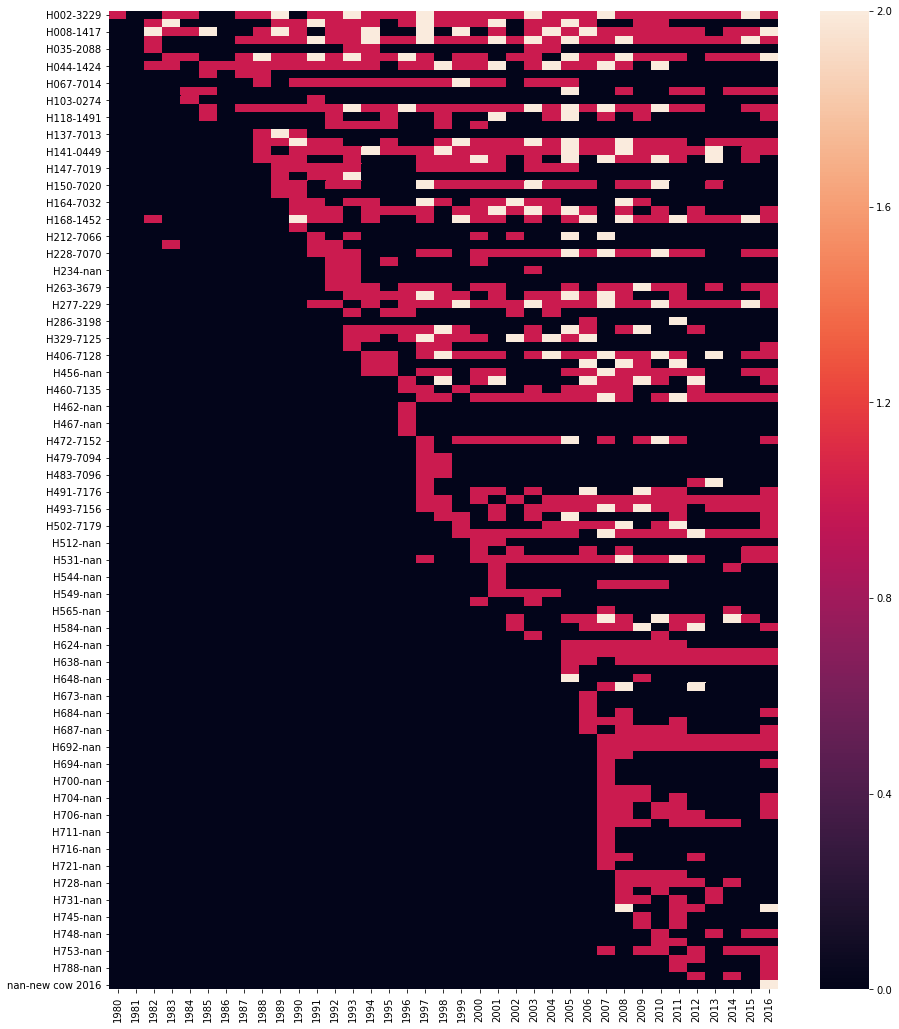

In [42]:
plt.figure(figsize=(15,18))
sns.heatmap(cleaned_matrix)

#### Birth model

##### When whale already had birth before

In this scenario, we can use Years Since Previous Birth (YSPB) as a variable. Looking at contiguous observed blocks in the matrix above (i.e. sections of time that whales were spotted), it looks like births are most likely to happen about every 4 years.

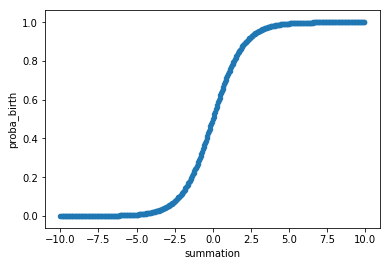

In [43]:
pd.DataFrame(
    {
        'summation': np.arange(-10,10,0.05),
        'proba_birth': logistic(np.arange(-10,10,0.05))
    }
).plot.scatter('summation','proba_birth')

## model_pyabc

### model test

### debug_test_params

In [44]:
def debug_params(test_params, model):
    """ Displays intermediary outputs for debugging. """
    
    plt.figure(figsize=(10,5))
    sns.heatmap(
        model(
            test_params
        )['debug'].T,
        annot=True,
        linecolor='red',
        linewidths=2
    )
    

In [45]:
# test_params = {
#     'start_age': 2,
#     'proba_start_alive': 1,
#     'proba_start_had_a_birth_before': 0.5,
#     'start_yspb': 1,
#     'had_no_births_yet_prior_constant': -5,
#     'had_no_births_yet_prior_age': 1,
#     'had_births_before_prior_constant': 1,
#     'had_births_before_prior_age': -0.06,
#     'had_births_before_prior_peak_yspb': 4,
#     'had_births_before_prior_width': -0.055,
#     'alive_proba': 1,
#     'observed_count_prior_seen_t_minus_1': 1,
#     'observed_count_prior_seen_before_t_minus_1': 1,
#     'observed_count_prior_constant': 1,
# }


# debug_params(test_params)

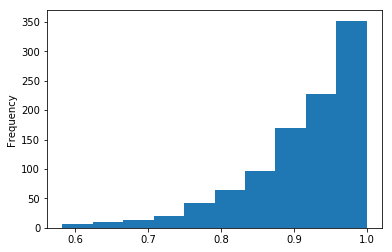

In [46]:
pd.Series([RV('beta', 10, 1).rvs() for i in range(1000)]).plot.hist()

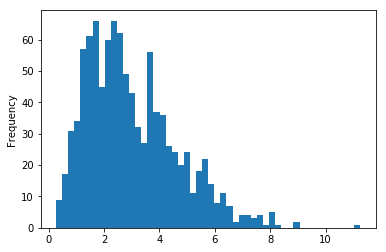

In [47]:
pd.Series([RV('gamma', 3, 0).rvs() for i in range(1000)]).plot.hist(bins=50)

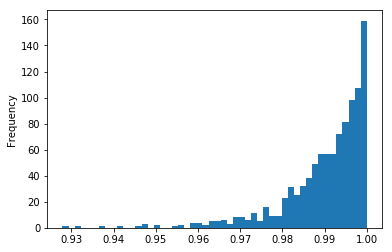

In [48]:
pd.Series([RV('beta', 100, 1).rvs() for i in range(1000)]).plot.hist(bins=50)

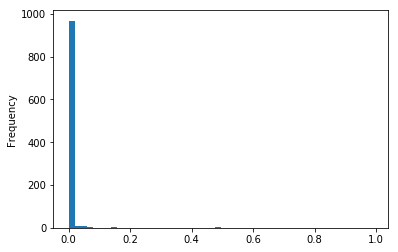

In [71]:
pd.Series([RV('beta', 0.01, 1).rvs() for i in range(1000)]).plot.hist(bins=50)

In [50]:
class DiscreteRV(RV):
    def pmf(self, x, *args, **kwargs):
        return self.distribution.pmf(round(x), *args, **kwargs)


In [51]:
class Constant():
    def __init__(self, x):
        self.value = x
        
    def pmf(self, x, *args, **kwargs):
        rounded_x = round(x)
        if rounded_x == self.value:
            return 1.0
        else:
            return 0.0
        
    def rvs(self):
        return self.value

In [52]:
c = Constant(5)
c.rvs()

5

In [53]:
c.pmf(10.)

0.0

In [54]:
c.pmf(4.9)

1.0

In [55]:
# had_births_before_prior_width: describes how wide the parabola is. Most likely to be negative.
# had_births_before_prior_peak_yspb: the most plausible years since previous birth.
# had_births_before_prior_age: as age increases, probability of giving birth linearly decreases.
#   Moves the parabola up/down
# had_births_before_prior_constant: The constant for an individual
#   Moves the parabola up/down

priors_for_each_individual = {
    'H002-3229': {
        'start_age': RV('uniform', 1, 80),
        'proba_start_alive': RV('uniform', 0, 1),
        'proba_start_had_a_birth_before': RV('uniform', 0, 1),
        'start_yspb': RV('uniform', 1, 49),
        'had_no_births_yet_prior_constant': RV('gamma', 3, 0),
        'had_no_births_yet_prior_age': RV('norm', 0, 2),
        'had_births_before_prior_constant': RV('gamma', 3, 0),
        'had_births_before_prior_age': RV('norm', -0.06, 0.25),
        'had_births_before_prior_width': RV('norm', -0.05, 0.05),
        'had_births_before_prior_peak_yspb': RV('norm', 4, 2),
        'alive_proba': RV('beta', 10, 1),
        'observed_count_prior_seen_t_minus_1': RV('norm', 1, 0.5),
        'observed_count_prior_seen_before_t_minus_1': RV('norm', 1, 0.5),
        'observed_count_prior_constant': RV('norm', 1, 0.5),
    }
}

In [56]:
drv = DiscreteRV('binom', n=1, p=0.5)

In [57]:
drv.rvs()

0

In [93]:
model_simple_priors = {
    'H002-3229': {
        'age t-1': RV('uniform', 25, 80),
        'proba_alive t-1': RV('beta', 100, 1), # should really be a constant 1
        'proba_birth t-1': RV('beta', 0.05, 1), # should really be a constant 0
        'proba_observed t-1': RV('beta', 100, 1), # should really be a constant 1
        'seen_previously t-1': RV('beta', 100, 1),
        'alive_proba': RV('beta', 10, 1),
        'unknown_birth_coeff': RV('norm', 0, 0.75),
        'birth_intercept': RV('norm', 0, 2),
        'observed_count_seen_previously_coeff': RV('norm', 1, 0.5),
        'observed_count_constant': RV('norm', 0, 0.5)
    }
}

## Run the model

In [94]:
priors = Distribution(**model_simple_priors['H002-3229'])

In [95]:
models = [
    model_simple
]

parameter_priors = [
    priors,
]

### distance function

In [75]:
def count_unobserveds(np_array):
    return (np_array == 0).sum()

def count_mothers_only(np_array):
    return (np_array == 1).sum()

def count_births(np_array):
    return (np_array == 2).sum()

In [76]:
def count_index(index, array):
    return (array == index).sum()

In [77]:
def count_differences(index, x_arr, y_arr):
    return count_index(index, x_arr) - count_index(index, y_arr)

In [78]:
simulated_values = np.array([2,0,2,0,2,0,2,0])

In [79]:
actual_values =    np.array([0,2,0,2,0,2,0,2])

In [80]:
abs(simulated_values - actual_values).sum()

16

In [81]:
def distance(x, y):
    data_x = x['data']
    data_y = y['data']
    
    step = 2
    
    error = 0
    
    for i in range(0, len(data_x), step):
        start_index = i
        end_index = i+step
        
        for observed_state in range(1,3):
            error += abs(
                count_differences(
                    observed_state,
                    data_x[start_index:end_index],
                    data_y[start_index:end_index]
                )
            )

    return error

distance(
    x={'data': np.array([1,1,1,1])},
    y={'data': np.array([2,1,1,1])},
)
        

2

In [82]:
distance(
    x={'data': np.array([1,2,1,1])},
    y={'data': np.array([2,1,1,1])},
)

0

In [83]:
def simple_distance(x,y):
    data_x = x['data']
    data_y = y['data']
    
    obs_birth_counts_diff = len(np.where(data_x == 2)) - len(np.where(data_y == 2))   
    return abs(data_x - data_y).sum() + obs_birth_counts_diff * obs_birth_counts_diff * 2

In [84]:
logging.basicConfig(format='%(asctime)-15s %(message)s')
logger = logging.getLogger()
logger.setLevel("INFO")

In [85]:
def sample_distribution(distribution):
    dictionary = {}
    for key in distribution.keys():
        dictionary[key] = distribution[key].rvs()
        
    return dictionary

In [96]:
sample_distribution(model_simple_priors['H002-3229'])

{'age t-1': 25.356731203209062,
 'proba_alive t-1': 0.9992096086086277,
 'proba_birth t-1': 1.6091442201069717e-09,
 'proba_observed t-1': 0.9973707584632329,
 'seen_previously t-1': 0.9976837292269738,
 'alive_proba': 0.9266918881326945,
 'unknown_birth_coeff': 1.5623465551866742,
 'birth_intercept': -2.7941943276535954,
 'observed_count_seen_previously_coeff': 0.9210573550513658,
 'observed_count_constant': -0.5696244329662775}

In [97]:
model_simple(sample_distribution(model_simple_priors['H002-3229']))

{'data': array([2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 'debug':     observed_counts_w_t-1  alive_w_t-1  repr_actives_w_t-1  births_w_t-1  \
 0                       1            1                   0             0   
 1                       2            1                   1             1   
 2                       0            1                   1             0   
 3                       1            1                   1             0   
 4                       1            1                   1             0   
 5                       0            0                   0             0   
 6                       0            0                   0             0   
 7                       0            0                   0             0   
 8                       0            0                   0             0   
 9                       0            0                   0             0   
 10                      0            0                   0             0   
 11             

In [114]:
[str(i) for i in range(2005,2017)]

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

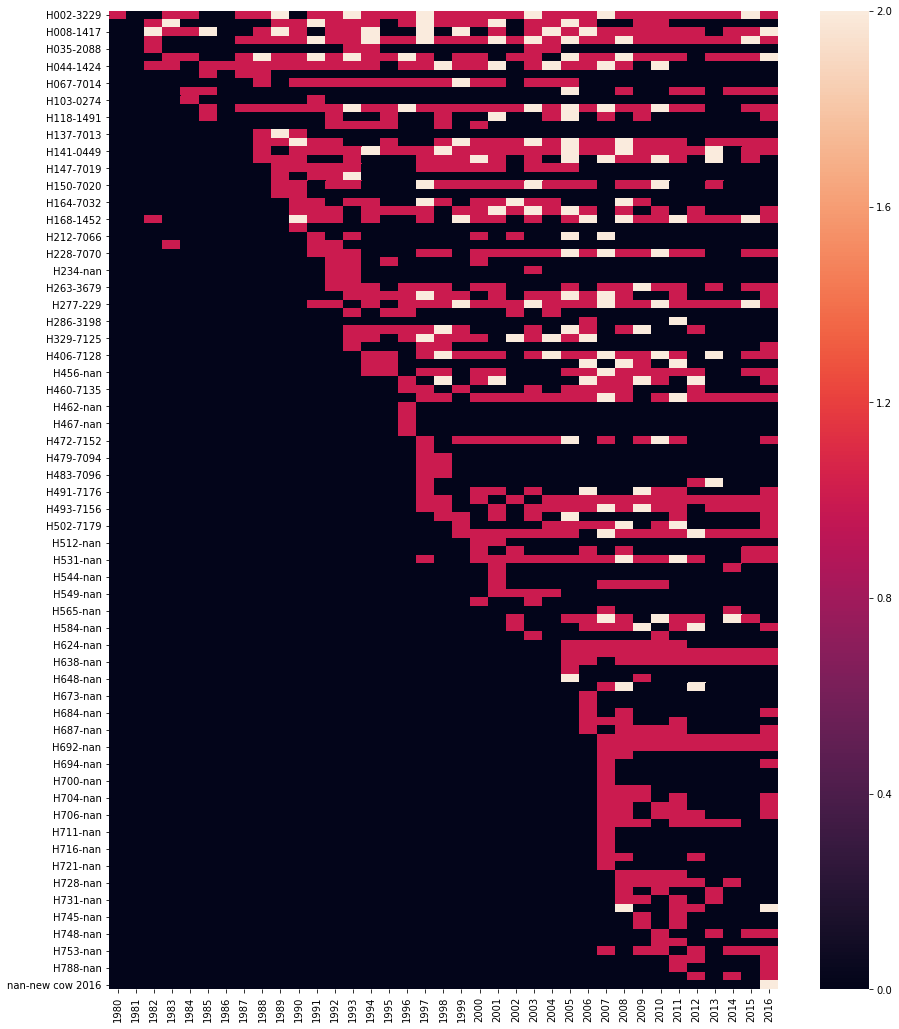

In [120]:
plt.figure(figsize=(15,18))
sns.heatmap(cleaned_matrix)

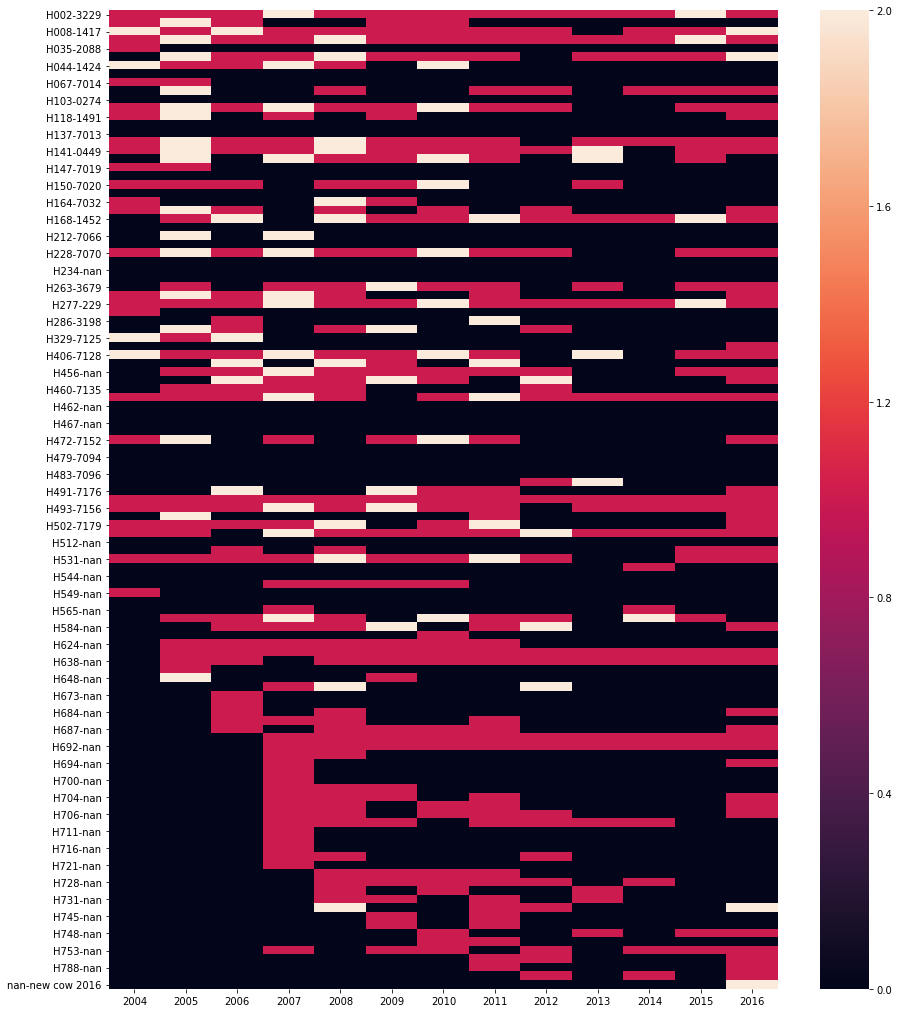

In [119]:
plt.figure(figsize=(15,18))
sns.heatmap(cleaned_matrix.loc[:,[str(i) for i in range(2004,2017)]])

In [98]:
abc = ABCSMC(
    models=models,
    parameter_priors=parameter_priors,
    distance_function=distance,
    population_size=500,
    eps=ListEpsilon([i for i in range(10,-1,-1)])
)

In [103]:
db_path = ('sqlite:///' +
    os.path.join(tempfile.gettempdir(), 'test.db'))
print(db_path)
abc_id = abc.new(db_path, {'data': cleaned_matrix.iloc[0, 25:]})

INFO:History:Start <ABCSMC(id=7, start_time=2019-04-05 12:13:13.132559, end_time=None)>


sqlite:////var/folders/_t/k13fpkjx41z2qd6ws3ry4tn00000gn/T/test.db


In [104]:
print('ABC-SMC run ID:', abc_id)

ABC-SMC run ID: 7


In [105]:
history = abc.run(minimum_epsilon=1, max_nr_populations=10,)

INFO:ABC:t:0 eps:10
INFO:ABC:t:1 eps:9
INFO:ABC:t:2 eps:8
INFO:ABC:t:3 eps:7
INFO:ABC:t:4 eps:6
INFO:ABC:t:5 eps:5
INFO:ABC:t:6 eps:4
INFO:ABC:t:7 eps:3
INFO:ABC:t:8 eps:2
INFO:ABC:t:9 eps:1
INFO:History:Done <ABCSMC(id=7, start_time=2019-04-05 12:13:13.132559, end_time=2019-04-05 12:30:26.198418)>


In [106]:
dist, w = history.get_distribution(m=0, t=9)

In [107]:
dist

name,age t-1,alive_proba,birth_intercept,observed_count_constant,observed_count_seen_previously_coeff,proba_alive t-1,proba_birth t-1,proba_observed t-1,seen_previously t-1,unknown_birth_coeff
id,,,,,,,,,,
26008,31.544312,0.962637,-0.543699,0.917740,2.110689,0.985566,0.402365,0.996120,0.996691,-0.664556
26009,42.452651,0.965797,0.000967,0.814909,1.285335,0.998206,0.190878,0.994964,0.982051,-0.343945
26010,69.753174,0.955670,-0.762756,1.097105,1.298229,0.995382,0.168676,0.998627,0.986756,-0.384985
26011,72.061107,0.972680,3.547075,0.425740,0.978690,0.999048,0.558236,0.986872,0.994470,-1.228598
26012,91.486635,0.959062,-0.200782,0.785973,1.711103,0.992230,0.142732,0.992254,0.992346,-0.679333
26013,60.442580,0.972526,-0.168423,-0.105932,1.231618,0.981210,0.386727,0.990910,0.995950,-0.687858
26014,82.481016,0.986576,-1.425783,0.312777,2.027202,0.978874,0.664014,0.991896,0.998186,-0.135096
26015,52.140866,0.969998,-1.460113,-0.197928,1.896518,0.984710,0.223563,0.993310,0.994126,-0.143735
26016,85.069488,0.974410,0.658354,0.351180,1.904574,0.993194,0.219845,0.984558,0.996227,-0.404206


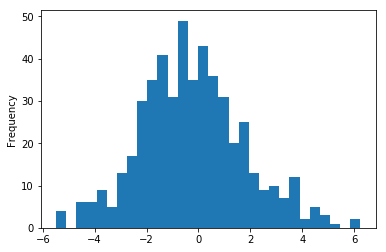

In [108]:
dist['birth_intercept'].plot.hist(bins=30)

In [109]:
dist.columns

Index(['age t-1', 'alive_proba', 'birth_intercept', 'observed_count_constant',
       'observed_count_seen_previously_coeff', 'proba_alive t-1',
       'proba_birth t-1', 'proba_observed t-1', 'seen_previously t-1',
       'unknown_birth_coeff'],
      dtype='object', name='name')

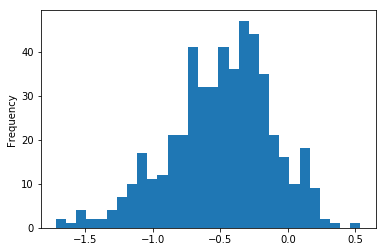

In [110]:
dist['unknown_birth_coeff'].plot.hist(bins=30)

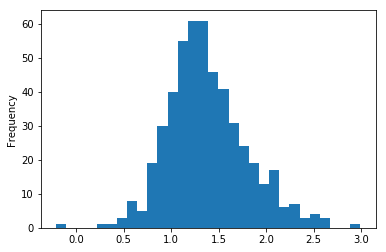

In [112]:
dist['observed_count_seen_previously_coeff'].plot.hist(bins=30)

In [102]:
model_simple(Distribution(model_simple_priors['H002-3229']))

TypeError: float() argument must be a string or a number, not 'Constant'

In [106]:
def plot_pdf(random_variable):
    samples = random_variable.rvs(size=1000)
    fig, ax = plt.subplots(1, 1)
    ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()

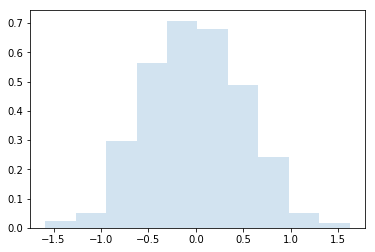

In [112]:
plot_pdf(sp.stats.norm(0, 0.5))

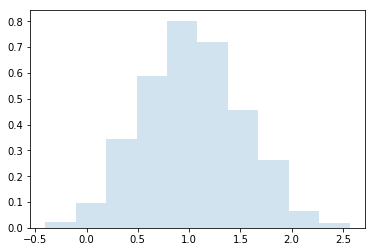

In [113]:
plot_pdf(sp.stats.norm(1, 0.5))

In [114]:
logistic(2)

0.8807970779778823

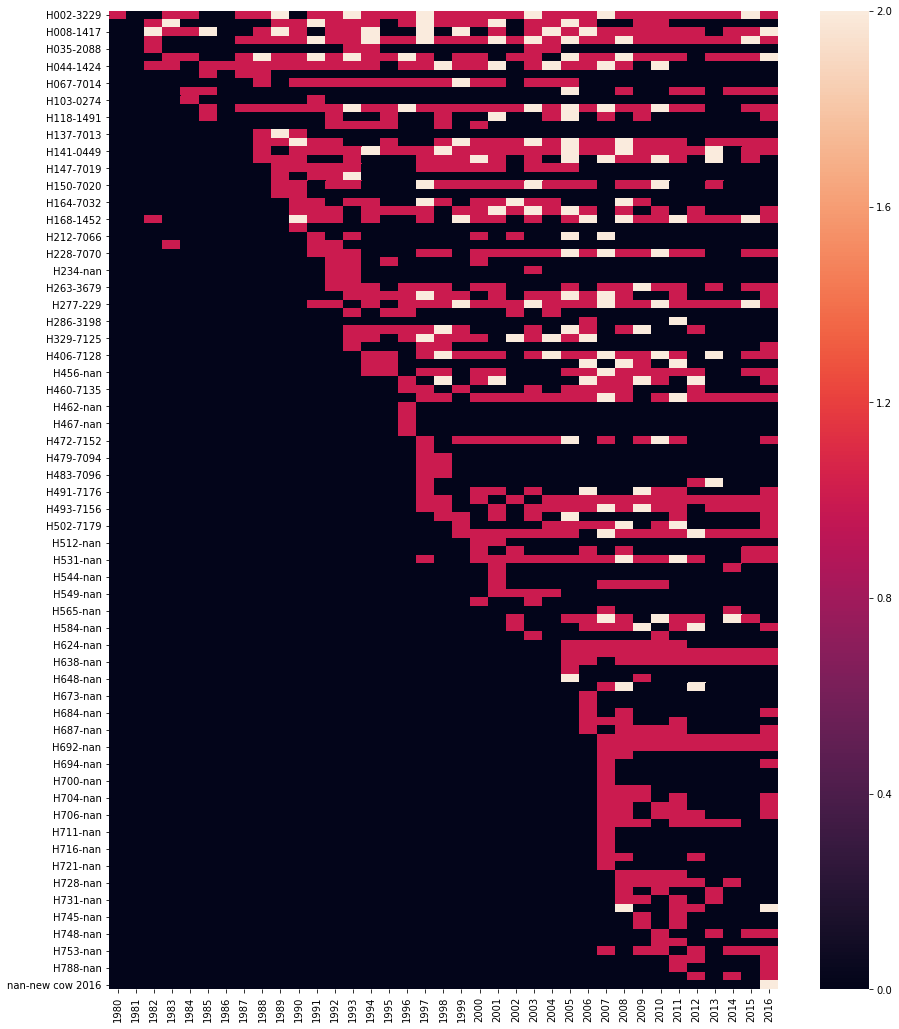

In [66]:
plt.figure(figsize=(15,18))
sns.heatmap(cleaned_matrix)

In [150]:
drv = DiscreteRV('binom', 1, 0.9)

In [153]:
drv.pmf(1)

0.9